# Assignment 2

## Problem : Image Matching

Implement exercises 4.2 and 4.4 in the Szeliski book.  I recommend using SIFT for 4.2, although you can choose another image descriptor, if you wish.  For your images, you can use any pair you like.  I have supplied a test pair on the class site: first_image and second_image.  Once you have a feature matching algorithm that works on a simple case, try it on a more challenging case.

**Ex 4.2:** 
Interest point descriptor Implement one or more descriptors (steered to local scale and orientation) and compare their performance (with your own or with a classmate’s detector).


Some possible descriptors include
* Contrast-normalized patches (Brown, Szeliski, and Winder 2005);
* SIFT (Lowe 2004);
* GLOH (Mikolajczyk and Schmid 2005);
* DAISY (Winder and Brown 2007; Tola, Lepetit, and Fua 2010).
* Other detectors are described by Mikolajczyk and Schmid (2005).

In [5]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from random import randrange
figsize = (10,10)

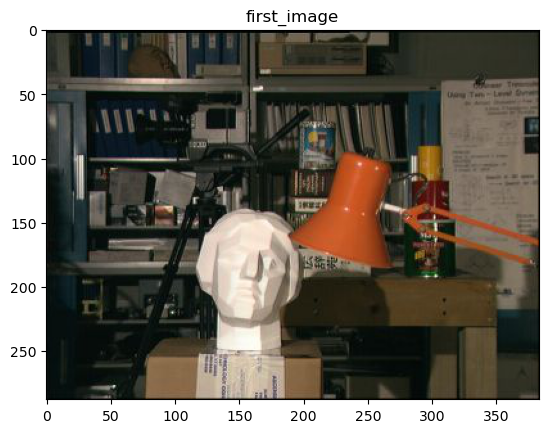

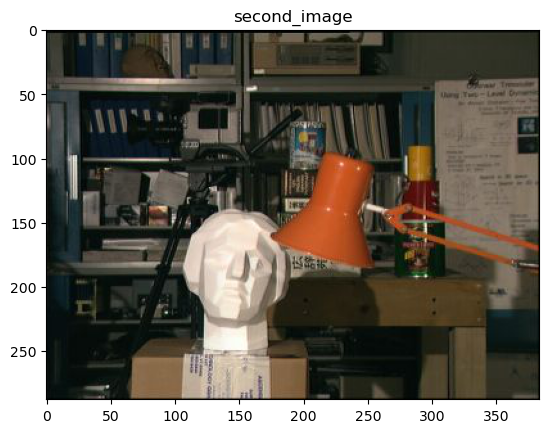

In [6]:
image1 = cv2.cvtColor(cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/first_image.jpg"), cv2.COLOR_BGR2RGB)
grayscale1 = cv2.cvtColor(image1, cv2.COLOR_RGB2GRAY)
image2 = cv2.cvtColor(cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/second_image.jpg"), cv2.COLOR_BGR2RGB)
grayscale2 = cv2.cvtColor(image2, cv2.COLOR_RGB2GRAY)

# Display the images
plt.imshow(image1)
plt.title("first_image")
plt.show()

plt.imshow(image2)
plt.title("second_image")
plt.show()


[ WARN:0@1.667] global shadow_sift.hpp:15 SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


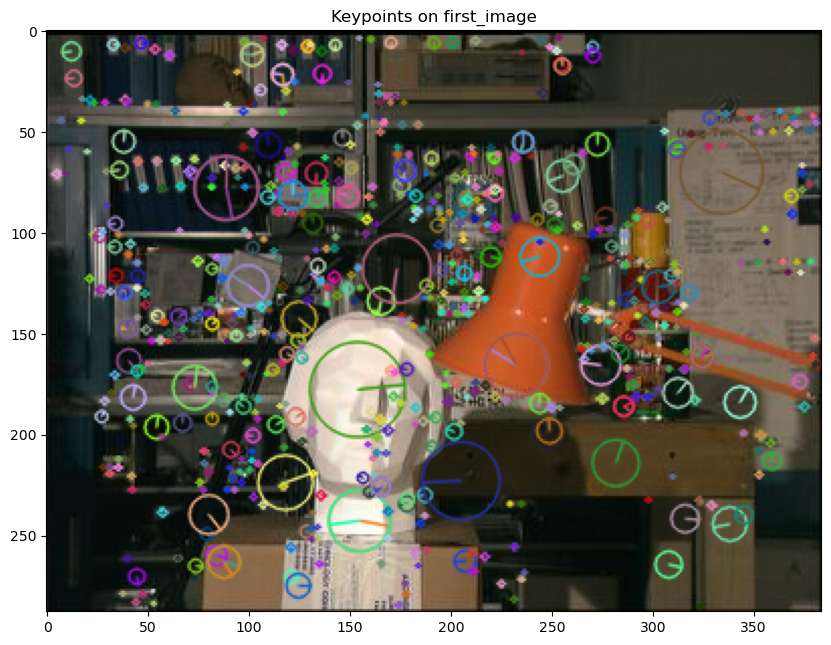

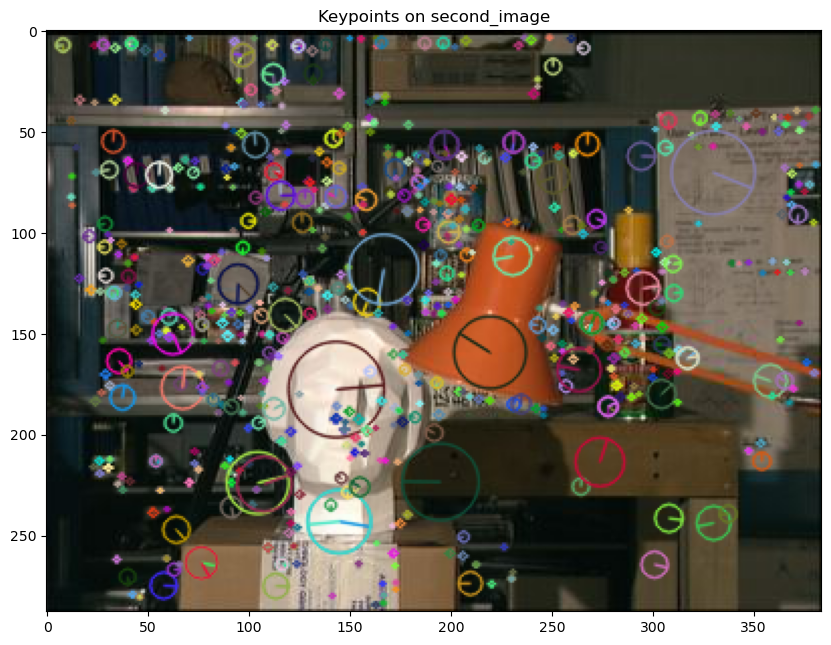

In [7]:
try:
    feature_extractor = cv2.xfeatures2d.SIFT_create()
except:
    print("SIFT not available")

# Extract keypoints and descriptors
keypoints1, descriptors1 = feature_extractor.detectAndCompute(grayscale1, None)
keypoints2, descriptors2 = feature_extractor.detectAndCompute(grayscale2, None)

# Draw the keypoints on the images
image1_with_keypoints = cv2.drawKeypoints(image1, keypoints1, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
image2_with_keypoints = cv2.drawKeypoints(image2, keypoints2, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Plot the images with keypoints
plt.figure(figsize=(10,10))
plt.imshow(image1_with_keypoints)
plt.title("Keypoints on first_image")
plt.show()

plt.figure(figsize=(10,10))
plt.imshow(image2_with_keypoints)
plt.title("Keypoints on second_image")
plt.show()

**Ex 4.4:**
Feature matcher After extracting features from a collection of overlapping or distorted images, match them up by their descriptors either using nearest neighbor matching or a more efficient matching strategy such as a k-d tree.

See whether you can improve the accuracy of your matches using techniques such as the nearest neighbor distance ratio

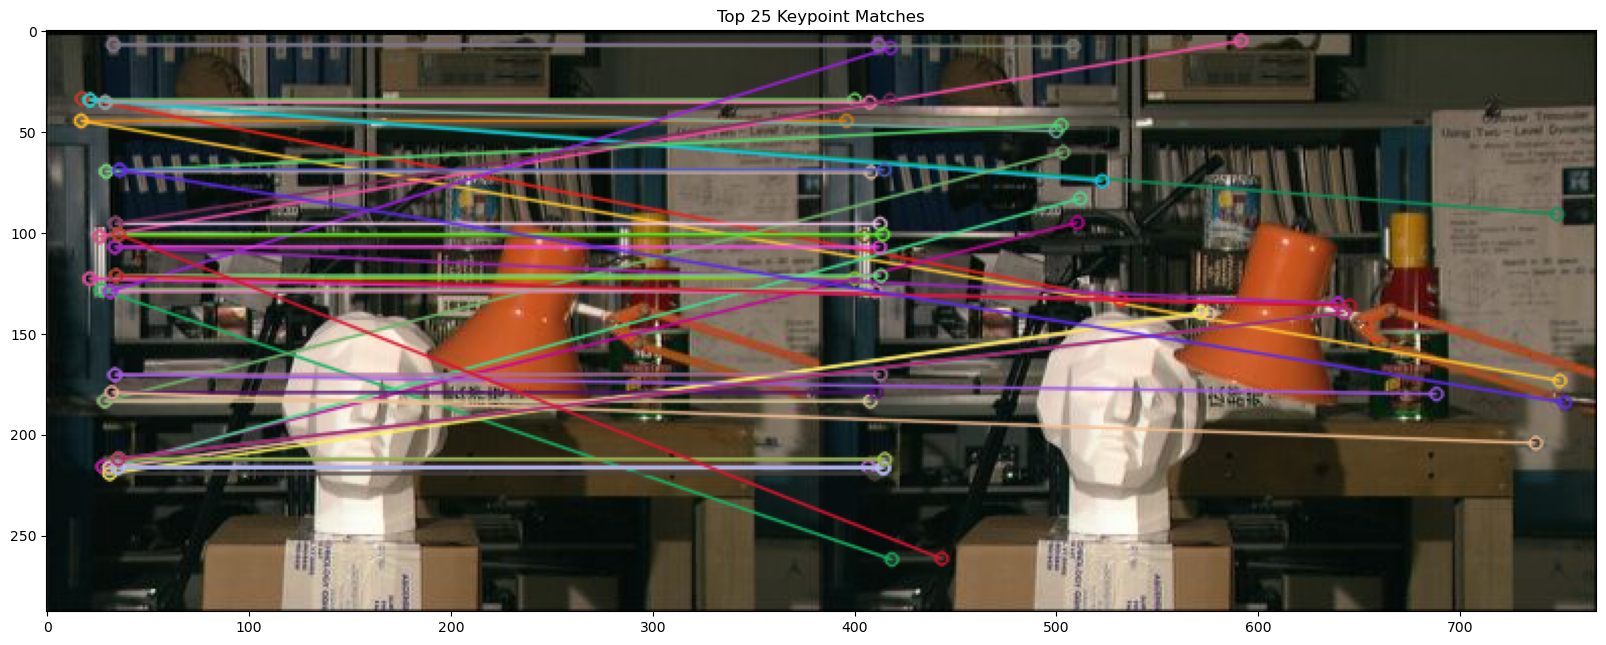

In [9]:
# Match keypoints using BFMatcher
bf_matcher = cv2.BFMatcher()
matches = bf_matcher.knnMatch(descriptors1, descriptors2, k=2)
good_matches = [m for m in matches if m[0].distance / m[1].distance < 0.8]
good_matches_array = np.asarray(good_matches)

# Display the top 25 matches
matched_image = cv2.drawMatchesKnn(image1, keypoints1, image2, keypoints2, good_matches[:25], None, flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
plt.figure(figsize=(20,20))
plt.imshow(matched_image)
plt.title("Top 25 Keypoint Matches")
plt.show()


## New Test image

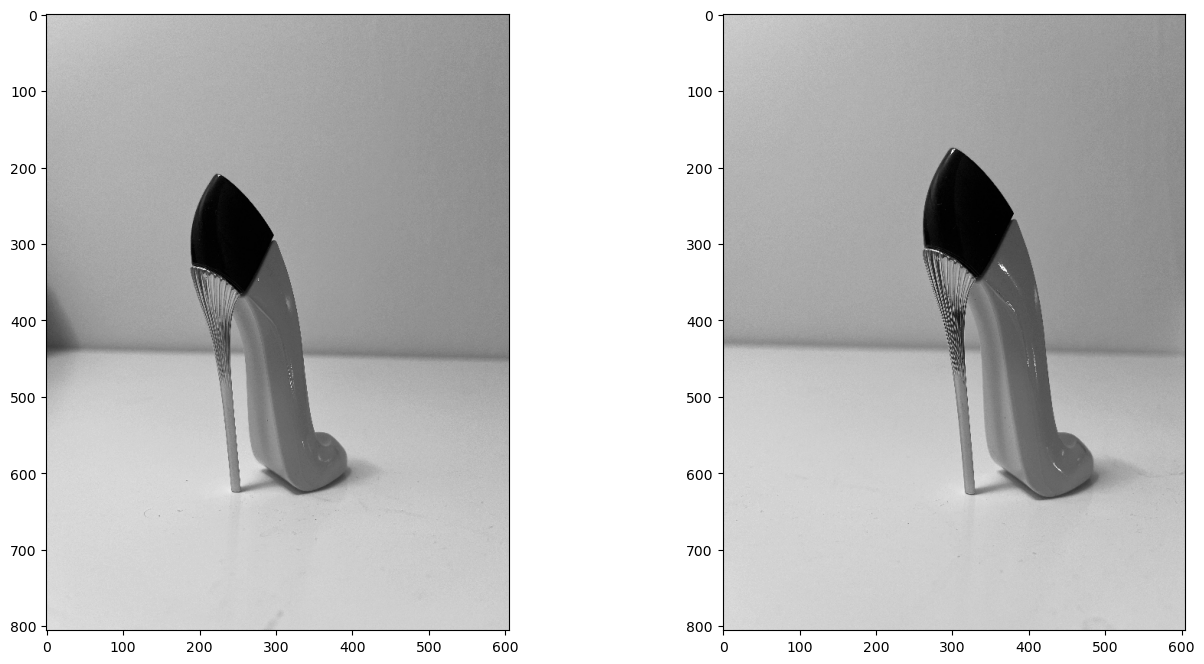

In [11]:
# Load new images to test it on complex case
img1 = cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/ch1.jpeg")
img2 = cv2.imread("/Users/kavanamanvi/Desktop/ComputerVision/HW2/ch2.jpeg")

img1_resized = cv2.resize(img1, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_CUBIC)
img2_resized = cv2.resize(img2, None, fx=0.2, fy=0.2, interpolation=cv2.INTER_CUBIC)
img1_gray = cv2.cvtColor(img1_resized, cv2.COLOR_BGR2GRAY)
img2_gray = cv2.cvtColor(img2_resized, cv2.COLOR_BGR2GRAY)
fig, axes = plt.subplots(1, 2, figsize=(16, 8))
axes[0].imshow(img1_gray, cmap='gray')
axes[1].imshow(img2_gray, cmap='gray')


In [12]:
keypoints1_resized, descriptors1_resized = feature_extractor.detectAndCompute(img1_gray, None)
keypoints2_resized, descriptors2_resized = feature_extractor.detectAndCompute(img2_gray, None)

img1_keypoints = cv2.drawKeypoints(img1_resized, keypoints1_resized, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
img2_keypoints = cv2.drawKeypoints(img2_resized, keypoints2_resized, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

fig, axes = plt.subplots(1, 2, figsize=(16, 8))
fig.suptitle("Keypoints Comparison")
axes[0].imshow(img1_keypoints)
axes[1].imshow(img2_keypoints)

In [13]:
bf_matcher_resized = cv2.BFMatcher(cv2.NORM_L1, crossCheck=True)
matches_resized = bf_matcher_resized.match(descriptors1_resized, descriptors2_resized)
matches_resized_sorted = sorted(matches_resized, key=lambda x: x.distance)

matched_img_resized = cv2.drawMatches(img1_resized, keypoints1_resized, img2_resized, keypoints2_resized, matches_resized_sorted[:15], img2_resized, flags=2)
plt.figure(figsize=(20,20))
plt.imshow(matched_img_resized)
plt.title("Matching Keypoints: Top 15 Matches")
plt.show()

## Problem 2

Implement programming assignment 1 from Chapter 11 of the Forsyth book.  Choose a stereo pair (or two adjacent frames in a video sequence); first_image and second_image are acceptable.  Pick your 8 points in two different ways: 1) use hand chosen points; 2) use your feature matching from problem 1 above.  Analyze the results of your program: in particular, what differences do you notice between the two fundamental matrices calculated? 

Left Grayscale Image


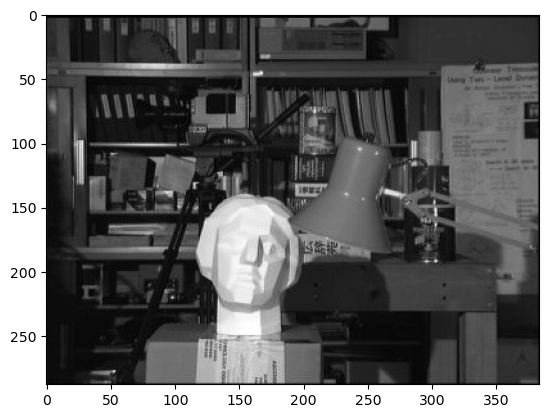

Right Grayscale Image


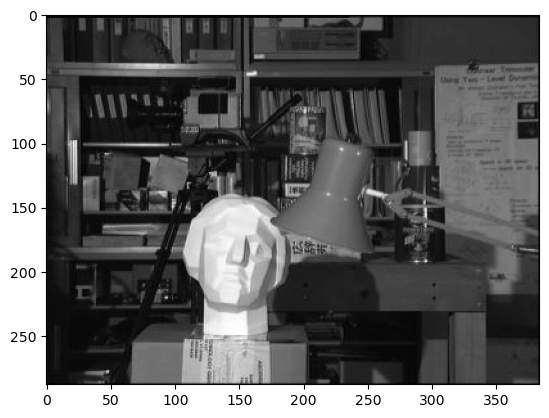

manual_pts_left: 
 [[ 50 130]
 [ 65 125]
 [ 78 118]
 [ 90 150]
 [145  35]
 [190  60]
 [240  15]
 [360  58]]
manual_pts_right: 
 [[ 48 132]
 [ 63 127]
 [ 75 116]
 [ 87 148]
 [142  33]
 [188  59]
 [237  14]
 [358  55]]
Estimated Fundamental Matrix (manual selection): 
 [[ 4.82360764e-05 -2.70198375e-03 -1.30804011e-02]
 [ 2.69447440e-03 -1.11042320e-04 -2.51989507e-01]
 [-1.85870530e-03  2.60384435e-01  1.00000000e+00]]


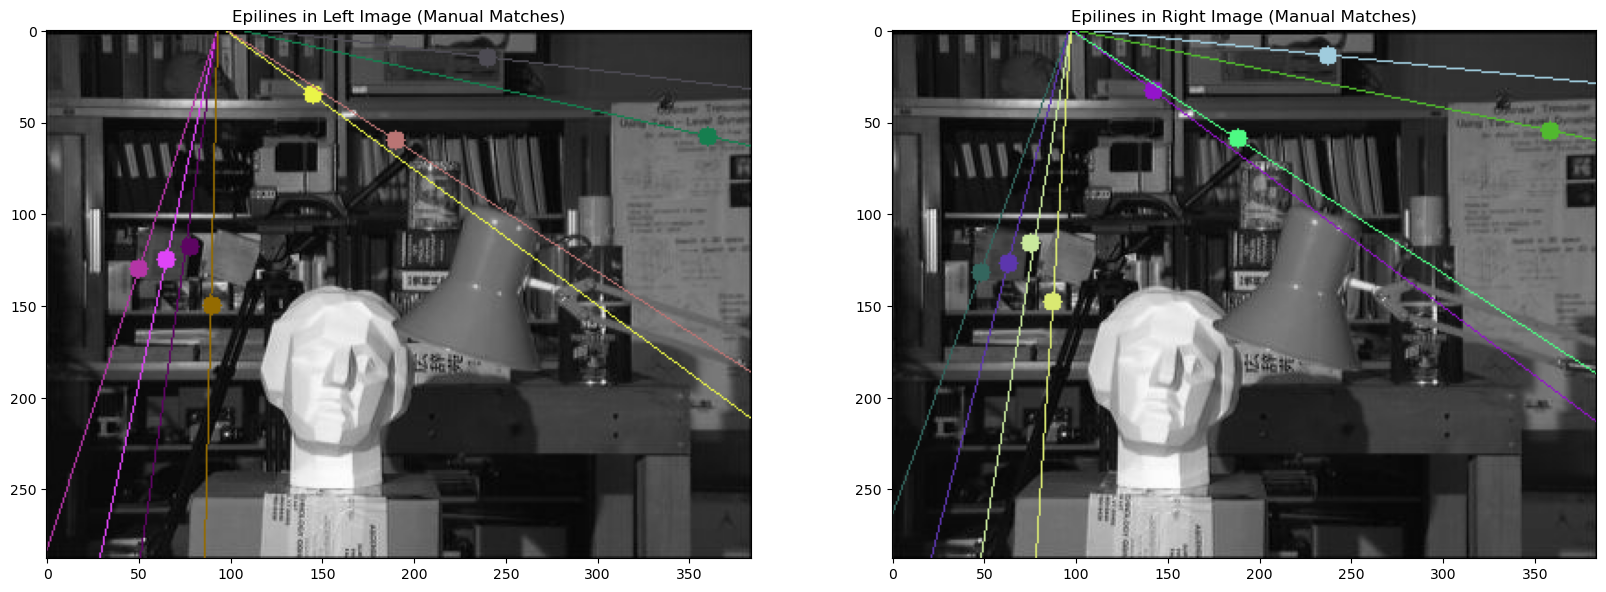

Estimated Fundamental Matrix (SIFT + FLANN): 
 [[ 9.69006039e-22  1.57108179e-18 -7.38632140e-18]
 [-1.51595611e-18  8.26346816e-20 -1.15986564e-02]
 [ 4.91163417e-18  1.15986564e-02  4.44089210e-16]]


In [16]:
print("Left Grayscale Image")
plt.imshow(grayscale1, cmap='gray')
plt.show()

print("Right Grayscale Image")
plt.imshow(grayscale2, cmap='gray')
plt.show()

input_gray = grayscale1
reference_gray = grayscale2

# hand chosen values
manual_pts_left = np.array([[50, 130], [65, 125], [78, 118], [90, 150], [145, 35], [190, 60], [240, 15], [360, 58]])
manual_pts_right = np.array([[48, 132], [63, 127], [75, 116], [87, 148], [142, 33], [188, 59], [237, 14], [358, 55]])

# Display selected points
print("manual_pts_left: \n", manual_pts_left)
print("manual_pts_right: \n", manual_pts_right)

# Estimate the fundamental matrix using the manually selected points
manual_F_matrix, match_mask = cv2.findFundamentalMat(manual_pts_left, manual_pts_right, cv2.FM_LMEDS)
print("Estimated Fundamental Matrix (manual selection): \n", manual_F_matrix)

# Function to draw epilines
def render_epilines(imgA, imgB, epilines, ptsA, ptsB):
    h, w = imgA.shape
    imgA_color = cv2.cvtColor(imgA, cv2.COLOR_GRAY2BGR)
    imgB_color = cv2.cvtColor(imgB, cv2.COLOR_GRAY2BGR)
    for r, ptA, ptB in zip(epilines, ptsA, ptsB):
        clr = tuple(np.random.randint(0, 255, 3).tolist())
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [w, -(r[2] + r[0]*w)/r[1]])
        imgA_color = cv2.line(imgA_color, (x0, y0), (x1, y1), clr, 1)
        imgA_color = cv2.circle(imgA_color, tuple(ptA), 5, clr, -1)
        imgB_color = cv2.circle(imgB_color, tuple(ptB), 5, clr, -1)
    return imgA_color, imgB_color

# Epilines for manual matches (right to left)
lines_manual_1 = cv2.computeCorrespondEpilines(manual_pts_right.reshape(-1, 1, 2), 2, manual_F_matrix)
lines_manual_1 = lines_manual_1.reshape(-1, 3)
img_epilines_left, _ = render_epilines(input_gray, reference_gray, lines_manual_1, manual_pts_left, manual_pts_right)

# Epilines for manual matches (left to right)
lines_manual_2 = cv2.computeCorrespondEpilines(manual_pts_left.reshape(-1, 1, 2), 1, manual_F_matrix)
lines_manual_2 = lines_manual_2.reshape(-1, 3)
img_epilines_right, _ = render_epilines(reference_gray, input_gray, lines_manual_2, manual_pts_right, manual_pts_left)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_epilines_left)
plt.title("Epilines in Left Image (Manual Matches)")
plt.subplot(122), plt.imshow(img_epilines_right)
plt.title("Epilines in Right Image (Manual Matches)")
plt.show()

# ========== FEATURE-BASED FUNDAMENTAL MATRIX ESTIMATION ========== #

# Use SIFT for keypoint detection
sift = cv2.xfeatures2d.SIFT_create()
kpsA, descA = sift.detectAndCompute(input_gray, None)
kpsB, descB = sift.detectAndCompute(reference_gray, None)

# FLANN matching configuration
index_params = dict(algorithm=0, trees=5)
search_params = dict(checks=50)
matcher = cv2.FlannBasedMatcher(index_params, search_params)
matches_flann = matcher.knnMatch(descA, descB, k=2)

# Lowe’s ratio test
keyptsA = []
keyptsB = []
refined_matches = []

for m, n in matches_flann:
    if m.distance < 0.08 * n.distance:
        refined_matches.append(m)
        keyptsA.append(kpsA[m.queryIdx].pt)
        keyptsB.append(kpsB[m.trainIdx].pt)

# Convert to np.int32
keyptsA = np.int32(keyptsA)
keyptsB = np.int32(keyptsB)

# Estimate F using best matches
F_auto, auto_mask = cv2.findFundamentalMat(keyptsA, keyptsB, cv2.FM_LMEDS)
print("Estimated Fundamental Matrix (SIFT + FLANN): \n", F_auto)

# Keep only inlier points
keyptsA = keyptsA[auto_mask.ravel() == 1]
keyptsB = keyptsB[auto_mask.ravel() == 1]

# Draw epilines using SIFT-based matches
epilines_1 = cv2.computeCorrespondEpilines(keyptsB.reshape(-1, 1, 2), 2, F_auto)
epilines_1 = epilines_1.reshape(-1, 3)
img_with_lines_A, _ = render_epilines(input_gray, reference_gray, epilines_1, keyptsA, keyptsB)

epilines_2 = cv2.computeCorrespondEpilines(keyptsA.reshape(-1, 1, 2), 1, F_auto)
epilines_2 = epilines_2.reshape(-1, 3)
img_with_lines_B, _ = render_epilines(reference_gray, input_gray, epilines_2, keyptsB, keyptsA)

plt.figure(figsize=(20, 20))
plt.subplot(121), plt.imshow(img_with_lines_A)
plt.title("Epilines (Left) - SIFT Matches")
plt.subplot(122), plt.imshow(img_with_lines_B)
plt.title("Epilines (Right) - SIFT Matches")
plt.show()


### Analyze differences:

Handchosen Fundamental Matrix: 
Estimated Fundamental Matrix (manual): 
 [[ 4.82360764e-05 -2.70198375e-03 -1.30804011e-02]
 [ 2.69447440e-03 -1.11042320e-04 -2.51989507e-01]
 [-1.85870530e-03  2.60384435e-01  1.00000000e+00]]
vs.

Fundamental Matrix (feature matching algo & more points): 
 [[ 9.69006039e-22  1.57108179e-18 -7.38632140e-18]
 [-1.51595611e-18  8.26346816e-20 -1.15986564e-02]
 [ 4.91163417e-18  1.15986564e-02  4.44089210e-16]]


Analysis
 * When comparing the two fundamental matrices, there’s a clear difference in how reliable they seem. The matrix from the manually selected points looks more stable and meaningful — the values fall within expected ranges and reflect a solid geometric relationship between the two images. On the other hand, the matrix from the SIFT + FLANN method has extremely tiny values, some nearly zero, which can be a sign that something went wrong during matching or estimation. This might be because the automatically detected keypoints included outliers or weren’t well spread across the image. Even though the manual approach uses fewer points, they were carefully chosen, which probably led to a more accurate result. The SIFT-based method can still work well, but it may need some refinement, like better filtering or normalization, to produce a more trustworthy matrix.



